In [76]:

'''
Created on 

DESCRIPTION

@author: ignacio
'''
from lib.utils import *
from lib.TabulaMuris import TabulaMuris
from lib.HumanTFs import HumanTFs
from lib.plot_utils import *
from lib.RFacade import RFacade

from lib.plot_utils import *
%matplotlib inline

df = pd.read_excel('../../../data/motif_biases/shortlist1+MCA_pooled/zscores_by_motif_bkp_cisbp_tabula_muris_median.expr_shortlist1+MCA_pooled.xlsx')
# df = DataFrameAnalyzer.read_tsv_gz('../../../data/full_results_tabula_muris.tsv.gz')
zscore_motif = 'z.score.motif.ont'
zscore_expr = 'z.score.expr'
df['sg'] = np.sqrt(((df[zscore_motif]) ** 2) + (np.where(df[zscore_expr] > 5, 5, df[zscore_expr]) ** 2))
df['role'] = np.where(df[zscore_motif] > 0, 'activator', 'repressor')

In [78]:
df.head()

,Unnamed: 0,motif.id,expr.dataset,ont.group,query.tissue,motif.density,median.log2FC.motif,z.median.log2FC.motif,z.score.expr,method,z.score.motif.ont,ensembl,name,sg,role
0,0,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,B cell,76.857749,0.041082,0.310190,NaN,median.expr,0.306753,ENSG00000181666,ZNF875,NaN,activator
1,1,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,Bergmann glial cell,70.900000,-0.075323,-0.769636,NaN,median.expr,-0.620446,ENSG00000181666,ZNF875,NaN,repressor
2,2,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,Brush cell of epithelium proper of large intes...,74.207188,-0.009549,-0.159493,NaN,median.expr,0.047253,ENSG00000181666,ZNF875,NaN,activator
3,3,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,DN1 thymic pro-T cell,72.318339,-0.046747,-0.504553,NaN,median.expr,-0.568724,ENSG00000181666,ZNF875,NaN,repressor
4,4,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,GSE117963_10X_lineage_positive_filtered_gene_b...,77.777778,0.058250,0.469442,NaN,median.expr,0.541544,ENSG00000181666,ZNF875,NaN,activator


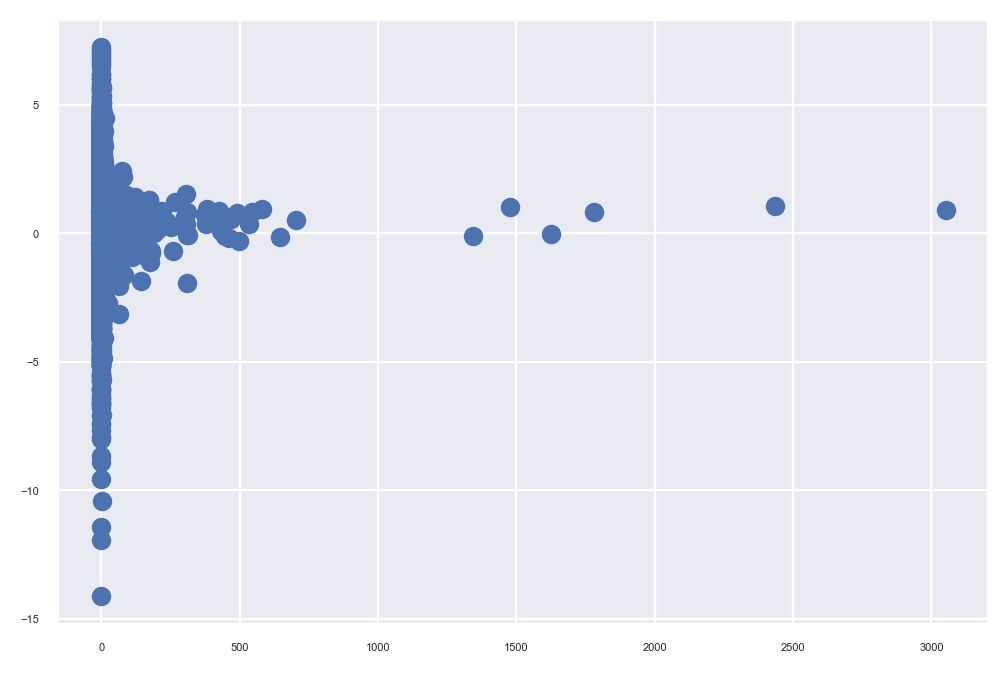

In [72]:
plt.scatter(df[zscore_expr], df[zscore_motif])

In [80]:
df.head()

,Unnamed: 0,motif.id,expr.dataset,ont.group,query.tissue,motif.density,median.log2FC.motif,z.median.log2FC.motif,z.score.expr,method,z.score.motif.ont,ensembl,name,sg,role
0,0,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,B cell,76.857749,0.041082,0.310190,NaN,median.expr,0.306753,ENSG00000181666,ZNF875,NaN,activator
1,1,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,Bergmann glial cell,70.900000,-0.075323,-0.769636,NaN,median.expr,-0.620446,ENSG00000181666,ZNF875,NaN,repressor
2,2,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,Brush cell of epithelium proper of large intes...,74.207188,-0.009549,-0.159493,NaN,median.expr,0.047253,ENSG00000181666,ZNF875,NaN,activator
3,3,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,DN1 thymic pro-T cell,72.318339,-0.046747,-0.504553,NaN,median.expr,-0.568724,ENSG00000181666,ZNF875,NaN,repressor
4,4,HKR1.RCADE_ENSG00000181666,tabula_muris,shortlist1+MCA_pooled,GSE117963_10X_lineage_positive_filtered_gene_b...,77.777778,0.058250,0.469442,NaN,median.expr,0.541544,ENSG00000181666,ZNF875,NaN,activator


In [79]:
df[(df['query.tissue'] == 'neuron') & (df['name'] == 'GMEB1')]

,Unnamed: 0,motif.id,expr.dataset,ont.group,query.tissue,motif.density,median.log2FC.motif,z.median.log2FC.motif,z.score.expr,method,z.score.motif.ont,ensembl,name,sg,role
7902,7902,M02116_1.94d_ENSG00000162419,tabula_muris,shortlist1+MCA_pooled,neuron,0.6,-0.415037,-0.393452,0.0,median.expr,-3.372633,ENSG00000162419,GMEB1,3.372633,repressor
52224,52224,M08733_1.94d_ENSG00000162419,tabula_muris,shortlist1+MCA_pooled,neuron,5.0,0.104337,0.144950,0.0,median.expr,1.025006,ENSG00000162419,GMEB1,1.025006,activator


In [81]:
# df['k'] = df.sort_values('sg', ascending=False).drop_duplicates('ensembl')
df['k'] = df['ensembl'] + "_" + df['query.tissue']
df = df.sort_values('sg', ascending=False).drop_duplicates('k')# pivot('query.tissue', 'ensembl', 'sg')


In [7]:
# hm[hm.index == 'MYT1L'].transpose().sort_values('MYT1L')

NameError: name 'hm' is not defined

In [82]:
df[df['name'] == 'ALX1'].sort_values('sg')

,Unnamed: 0,motif.id,expr.dataset,ont.group,query.tissue,motif.density,median.log2FC.motif,z.median.log2FC.motif,z.score.expr,method,z.score.motif.ont,ensembl,name,sg,role,k
12992,12992,M05586_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,stromal cell,28.700000,-0.011237,-0.073199,0.0,median.expr,-0.172767,ENSG00000180318,ALX1,0.172767,repressor,ENSG00000180318_stromal cell
12946,12946,M05586_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,granulocyte monocyte progenitor cell,28.000000,-0.046861,-0.291141,0.0,median.expr,-0.207744,ENSG00000180318,ALX1,0.207744,repressor,ENSG00000180318_granulocyte monocyte progenito...
12962,12962,M05586_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,lymphocyte,30.235784,0.063969,0.386902,0.0,median.expr,0.259175,ENSG00000180318,ALX1,0.259175,activator,ENSG00000180318_lymphocyte
12984,12984,M05586_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,pre-natural killer cell,28.400000,-0.026397,-0.165945,0.0,median.expr,-0.265242,ENSG00000180318,ALX1,0.265242,repressor,ENSG00000180318_pre-natural killer cell
12922,12922,M05586_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,basal cell,28.500000,-0.021326,-0.134921,0.0,median.expr,-0.302462,ENSG00000180318,ALX1,0.302462,repressor,ENSG00000180318_basal cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44591,44591,M08464_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,Brush cell of epithelium proper of large intes...,17.970402,0.233353,1.368159,0.0,median.expr,1.786832,ENSG00000180318,ALX1,1.786832,activator,ENSG00000180318_Brush cell of epithelium prope...
44656,44656,M08464_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,myofibroblast cell,13.105727,-0.222072,-1.181043,0.0,median.expr,-2.233827,ENSG00000180318,ALX1,2.233827,repressor,ENSG00000180318_myofibroblast cell
12934,12934,M05586_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,endothelial cell,24.186047,-0.258113,-1.583551,0.0,median.expr,-2.399930,ENSG00000180318,ALX1,2.399930,repressor,ENSG00000180318_endothelial cell
44645,44645,M08464_1.94d_ENSG00000180318,tabula_muris,shortlist1+MCA_pooled,lung endothelial cell,11.613876,-0.396420,-2.156939,0.0,median.expr,-3.218024,ENSG00000180318,ALX1,3.218024,repressor,ENSG00000180318_lung endothelial cell


In [9]:
!ls -ltrh 

total 60K
-rwxrwxrwx 1 rio rio 1.9K Dec 19  2018 wp_0_plot_zscores_by_gene_groups.py
-rwxrwxrwx 1 rio rio 2.0K Dec 20  2018 wp_0_generate_motifs_matrix.py
-rwxrwxrwx 1 rio rio 5.1K Dec 25  2018 wp_1_compare_motif_biases.py
-rwxrwxrwx 1 rio rio 5.8K Feb  6  2019 wp_2_plot_motif_bias_vs_expr.py
-rwxrwxrwx 1 rio rio  13K Aug 21  2019 wp_3_plot_zscores_multiple_tissues.py
-rwxrwxrwx 1 rio rio  20K Aug 11 15:36 wp_3_plot_zsscores_multiple_tissues.ipynb


../../../data/18_global_annotation_csv/annotations_facs.csv
../../../data/18_global_annotation_csv/annotations_facs.csv
{'fibroblast', 'B cell', 'oligodendrocyte', 'cardiac muscle cell', 'epithelial cell', 'microglial cell', 'epidermal cell', 'neuron', 'hepatocyte', 'monocyte', 'bladder cell', 'granulocyte', 'astrocyte', 'keratinocyte', 'endothelial cell', 'type B pancreatic cell', 'skeletal muscle satellite cell', 'T cell'}
query.tissue
B cell                             7.580318
T cell                             5.374881
astrocyte                          4.329988
bladder cell                       4.743050
cardiac muscle cell                5.185854
endothelial cell                  12.111931
epidermal cell                     5.659885
epithelial cell                    7.821748
fibroblast                         8.210995
granulocyte                        5.408625
hepatocyte                         4.496826
keratinocyte                       5.174612
microglial cell               

/home/rio/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


query.tissue
B cell                            5.556721
T cell                            4.083324
astrocyte                         5.729561
bladder cell                      5.631768
cardiac muscle cell               4.243868
endothelial cell                  4.324373
epidermal cell                    7.780513
epithelial cell                   7.559891
fibroblast                        4.244039
granulocyte                       4.665725
hepatocyte                        4.431663
keratinocyte                      7.728914
microglial cell                   4.425472
monocyte                          5.385333
neuron                            4.572842
oligodendrocyte                   4.486236
skeletal muscle satellite cell    5.502154
type B pancreatic cell            5.311473
dtype: float64


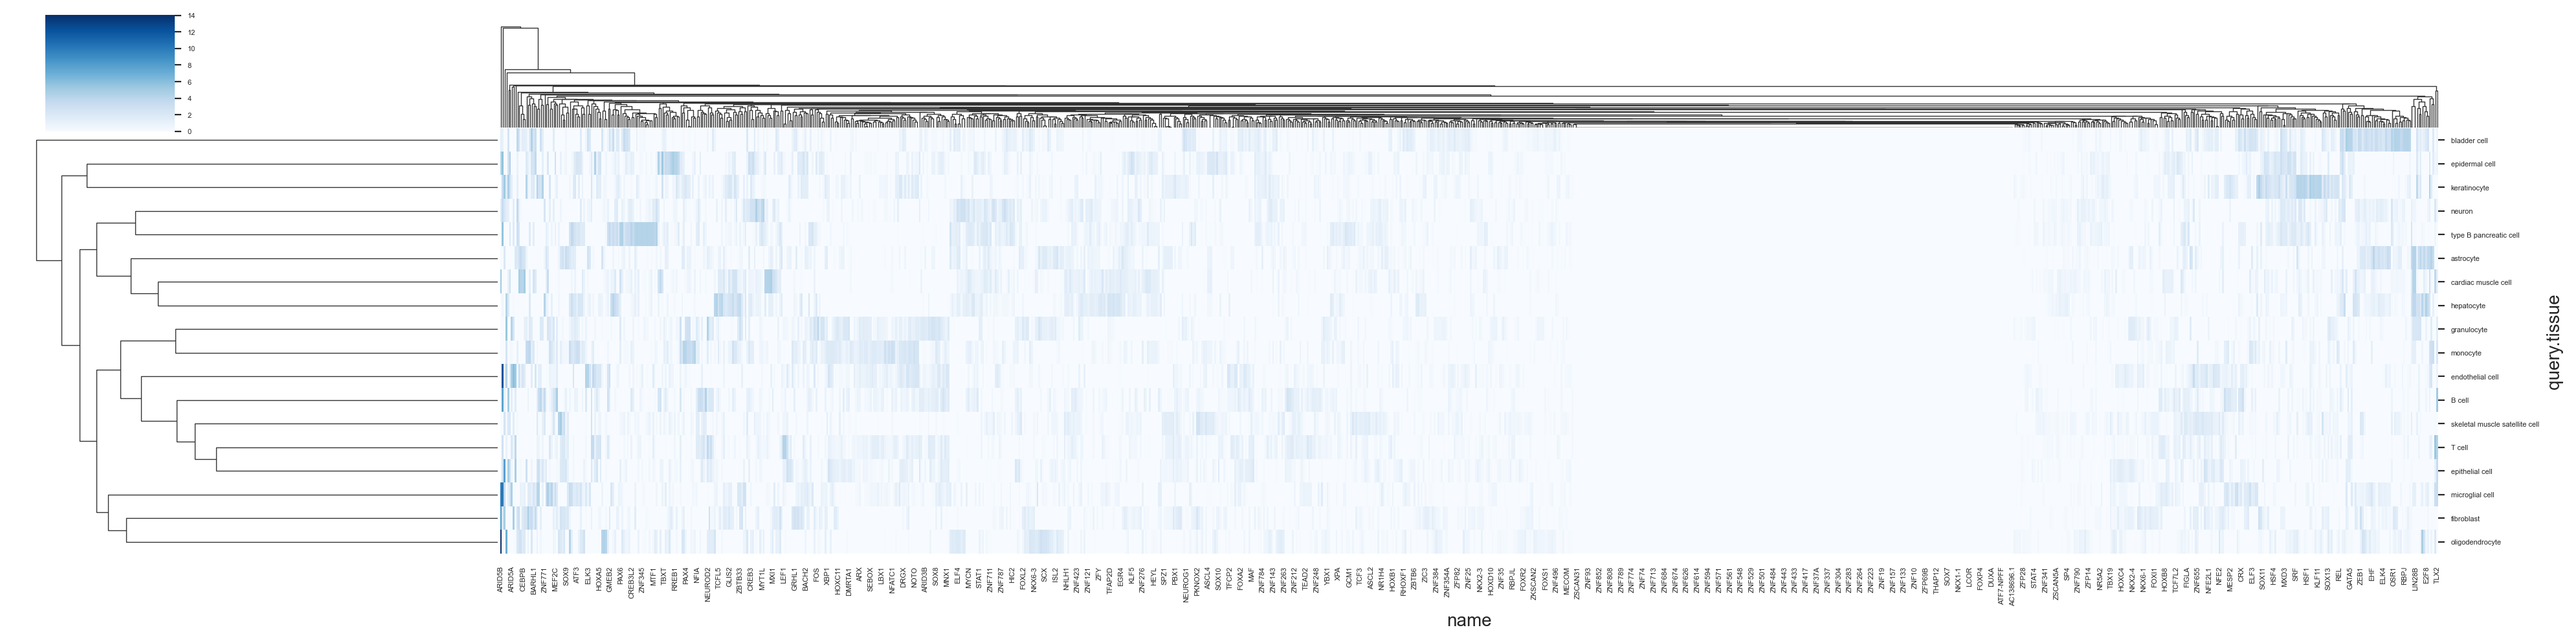

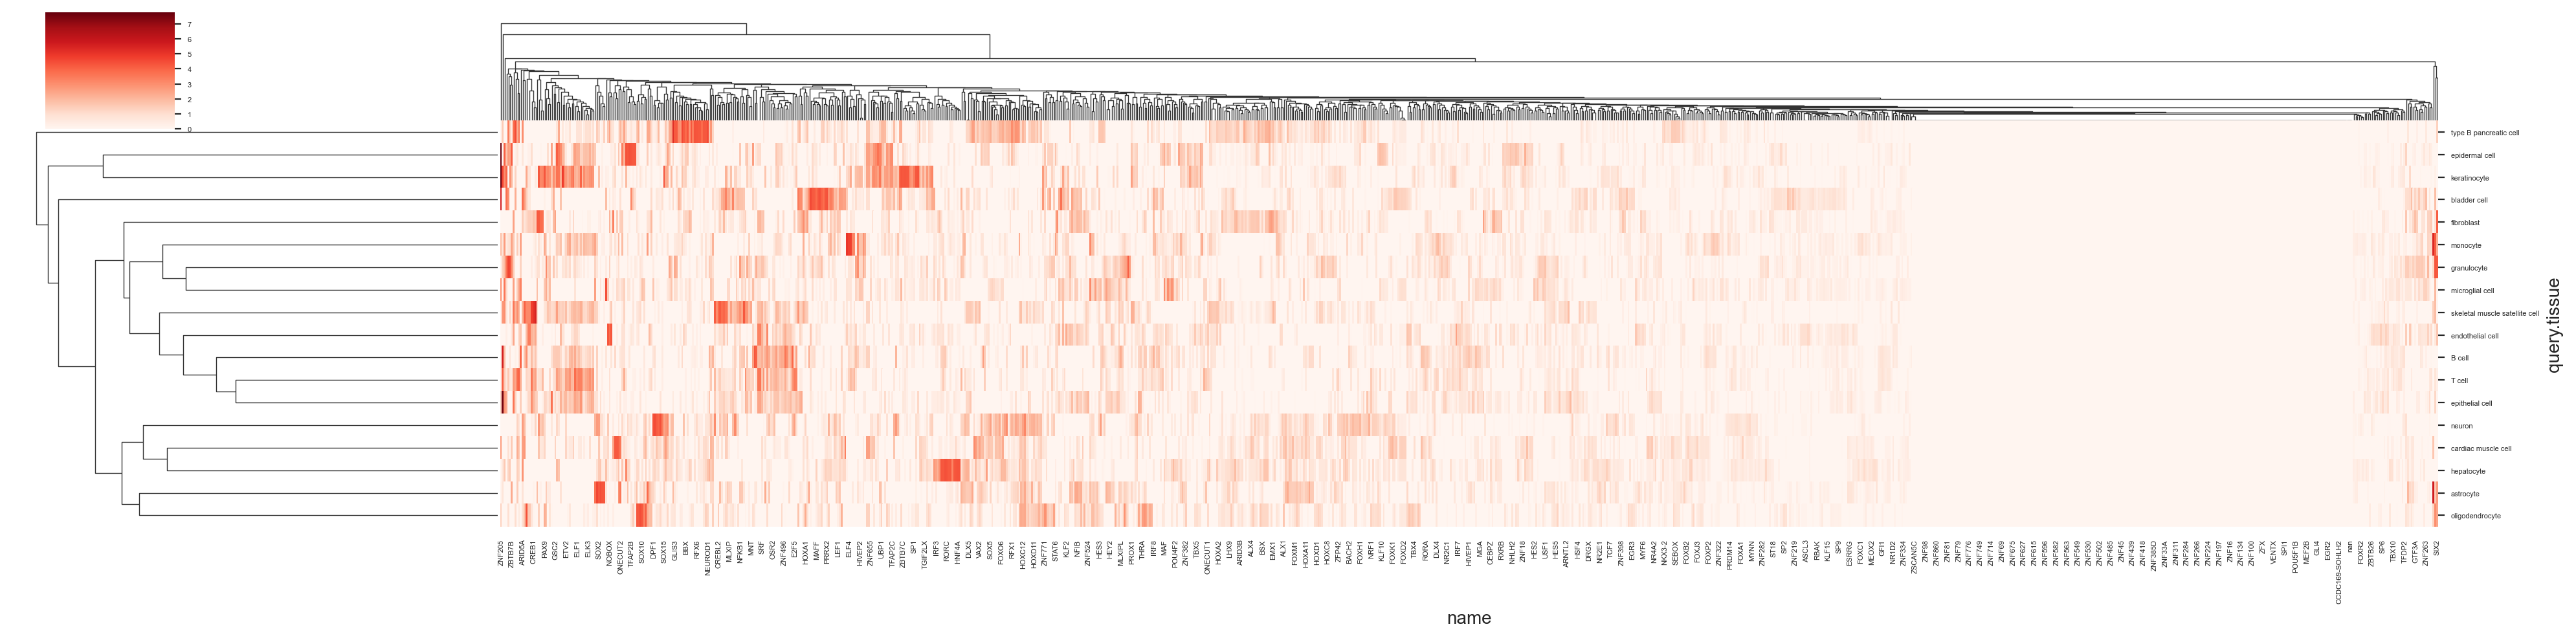

In [83]:
rcParams['figure.dpi'] = 200
# df[df['ensembl'] == 'ENSG00000185591'].sort_values('query.tissue')
# df['ensembl'].value_counts()

# only show shortlist1 

# only show specific tissue (shortlist 1 and 2)
tm = TabulaMuris(method='FACS', basedir='../../../data')
selected = set(tm.get_ont_definitions(datadir='../../../data')['shortlist1'])

print(selected)
hm = df[df['query.tissue'].isin(selected) & (df['role'] == 'repressor')].pivot('name', 'query.tissue', 'sg').fillna(0).transpose()
print(hm.max(axis=1))
sns.clustermap(hm, cmap='Blues', figsize=[20, 5])

hm = df[df['query.tissue'].isin(selected) & (df['role'] == 'activator')].pivot('name', 'query.tissue', 'sg').fillna(0).transpose()


print(hm.max(axis=1))
sns.clustermap(hm, cmap='Reds', figsize=[20, 5])

In [84]:
g

'shortlist1+MCA_pooled'

In [107]:
# hm3 = hm3[~pd.isnull(hm.index)]
hm3[hm3.index.str.contains('MYT1L')]

ont,B cell,T cell,astrocyte,bladder cell,cardiac muscle cell,endothelial cell,epidermal cell,epithelial cell,fibroblast,granulocyte,hepatocyte,keratinocyte,microglial cell,monocyte,neuron,oligodendrocyte,skeletal muscle satellite cell,type B pancreatic cell
name,,,,,,,,,,,,,,,,,,
MYT1L,-0.335654,-0.338352,0.381481,0.7095,-0.373425,-0.362125,0.872849,-0.336246,0.82276,-0.404617,0.397501,-0.370272,0.361068,-0.716004,-3.815885,-0.359895,0.399786,-2.283789


In [108]:
hm3.sort_values('neuron')[['neuron']].head(20)
# hm3[hm3.index.str.contains('MYT1L')]
# order_by_row

ont,neuron
name,
HIVEP2,-4.597362
NR2C2,-4.295708
MYT1L,-3.815885
NR2F2,-3.585455
GMEB1,-3.372633
PRDM4,-3.127727
THRA,-3.035493
NOBOX,-2.861170
CREB3,-2.835260


In [193]:
def plot_barplot(query_ont, df, figsize=None, dpi=100):
    rcParams['figure.dpi'] = dpi
    rcParams['figure.figsize'] = [10, 2.5] if figsize is None else figsize
    grp = df[df['query.tissue'] == query_ont]
    grp.sort_values('sg')
    grp[grp['name'] == 'MYT1L']
    # print(query_ont, grp.shape)
    # sns.distplot(grp['sg'])
    plt.subplot(1, 2, 1)
    sns.barplot(data=grp[grp['role'] == 'repressor'].sort_values('sg', ascending=False).head(10), x='sg', y='name')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.title('%s - repressor' % query_ont)
    plt.subplot(1, 2, 2)

    sns.barplot(data=grp[grp['role'] == 'activator'].sort_values('sg', ascending=False).head(10), x='sg', y='name')
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.title('%s - activator' % query_ont)

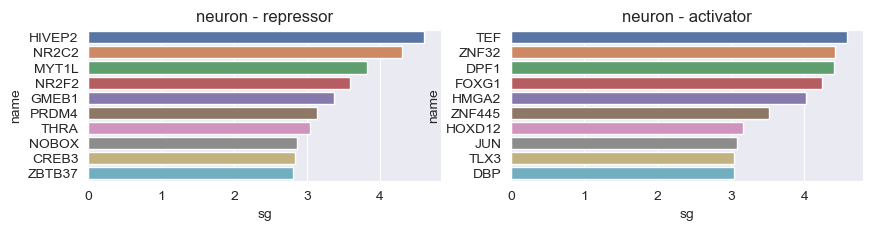

In [194]:
plot_barplot('neuron', df, figsize=[10, 2])

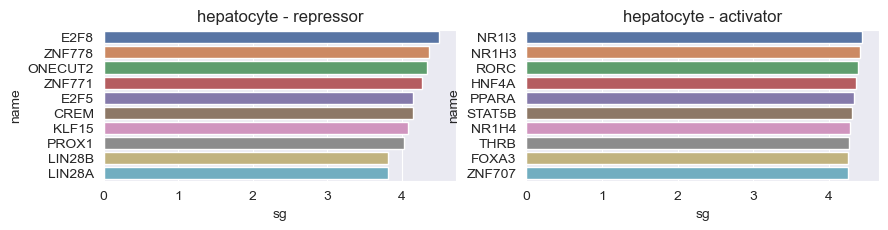

In [195]:
plot_barplot('hepatocyte', df, figsize=[10, 2])

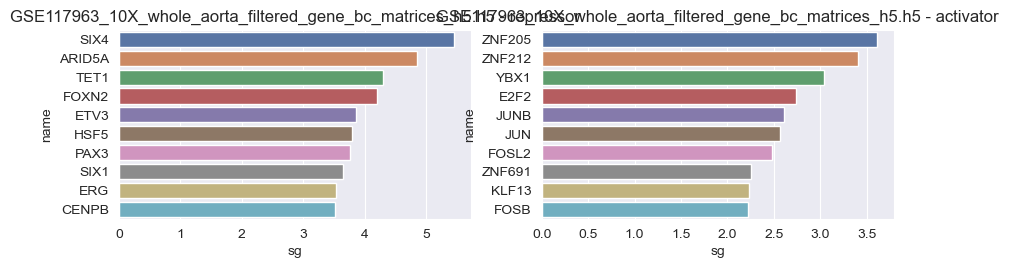

In [196]:
plot_barplot('GSE117963_10X_whole_aorta_filtered_gene_bc_matrices_h5.h5', df)

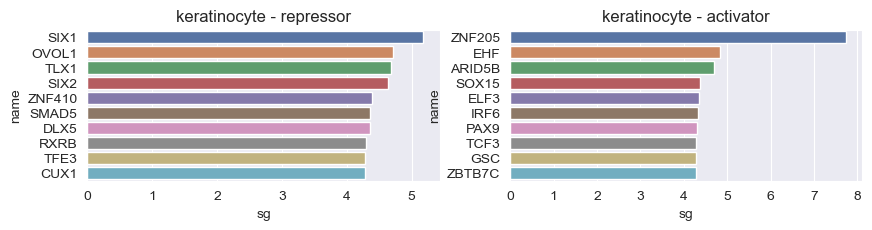

In [197]:
plot_barplot('keratinocyte', df, figsize=[10, 2])

### Plot the values regardless of directionality

expr.median shortlist1+MCA_pooled True
../../../data/18_global_annotation_csv/annotations_facs.csv
../../../data/18_global_annotation_csv/annotations_facs.csv


/home/rio/miniconda3/envs/mypython3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  


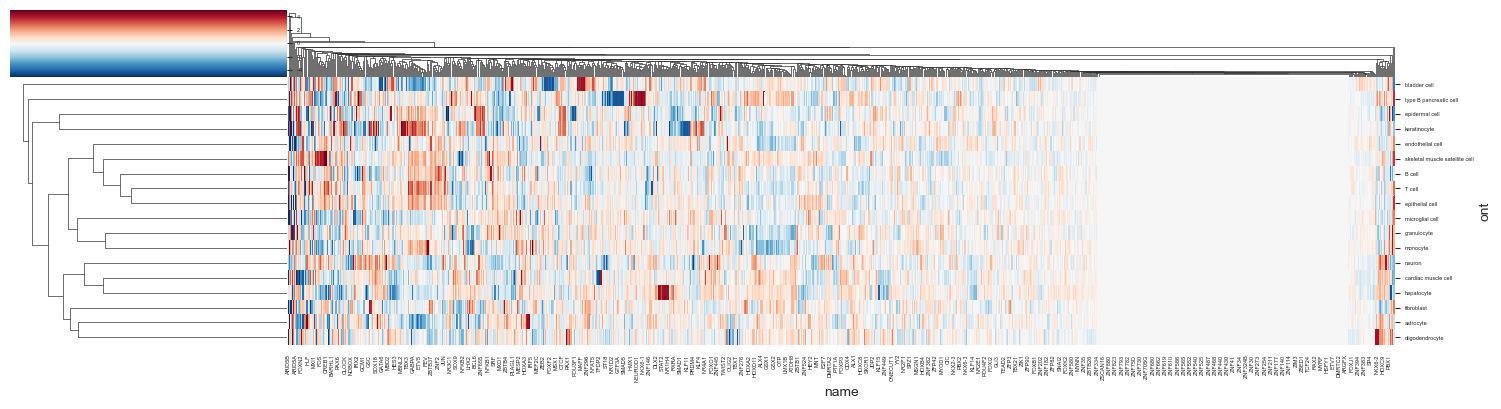

In [99]:
rcParams['figure.dpi'] = 100
apply_rank = True
print(by, g, apply_rank)
# print by, g, grp2.shape[0]
grp2['k2'] = grp2['k'] + "_" + grp2['ont']
grp2 = grp2.drop_duplicates('k2')
# only show specific tissue (shortlist 1 and 2)
tm = TabulaMuris(method='FACS', basedir='../../../data')
selected = set(tm.get_ont_definitions(datadir='../../../data')['shortlist1']).union(tm.get_ont_definitions(datadir='../../../data')['shortlist2'])
grp2 = grp2[grp2['ont'].isin(selected)]
hm = grp2.pivot('name', 'ont', zscore_expr)
hm2 = grp2.pivot('name', 'ont', zscore_motif)
hm3 = np.sqrt((hm ** 2) + (hm2 ** 2))
hm3 = pd.DataFrame(np.where(hm2 > 0, hm3, -hm3), index=hm.index, columns=hm.columns)
hm3 = pd.DataFrame(np.where(np.isnan(hm3), 0, hm3), index=hm3.index, columns=hm3.columns)
hm3 = hm3[~pd.isnull(hm.index)]
sns.clustermap(hm3.transpose(), cmap='RdBu_r', vmax=5, vmin=-5,  figsize=[20, 5])
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
plt.subplots_adjust(right=0.7, bottom=0.3)
# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s" % (by, g))
# plt.close()
# plt.close()

### Store the (max, min observed value per case)

In [106]:


# plot top20 by max positive and negative value
top = {tf: max(r.values) for tf, r in hm3.iterrows()}
bottom = {tf: min(r.values) for tf, r in hm3.iterrows()}
n = 157 # len(top)
topN = [k for k in sorted(top.keys(), key=lambda x: -top[x])][:n]

for ni in range(1, 1000):
    bottomN = [k for k in sorted(top.keys(), key=lambda x: bottom[x])][:ni]
    if 'Myt1l_M00842_1.94d' in set(bottomN):
        print('Myt1', ni)
        if 'Prox1_M06028_1.94d' in set(bottomN):
            print('Prox1', ni)
            break
print(top['MYT1L'], bottom['MYT1L'])
print('MYT1L' in set(topN))

0.8728490281513667 -3.8158849833304247
False


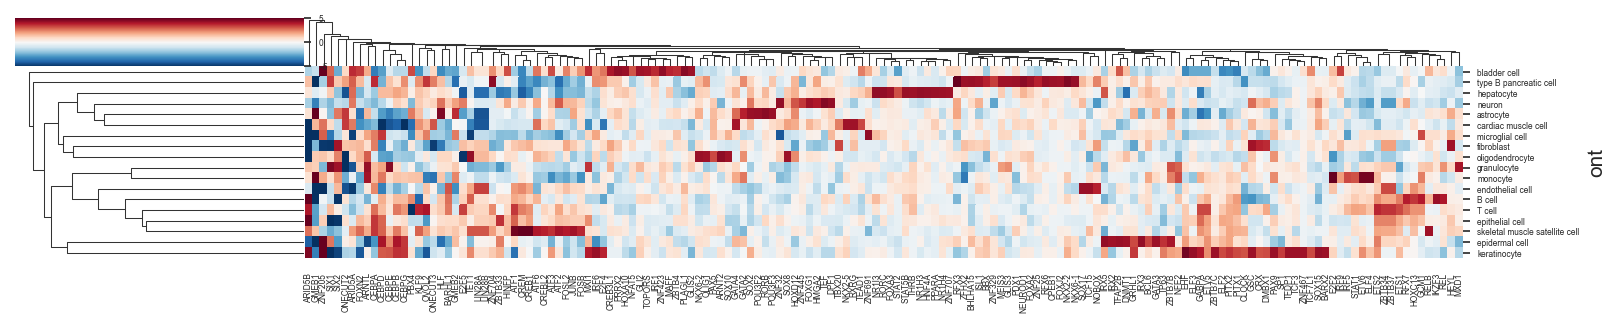

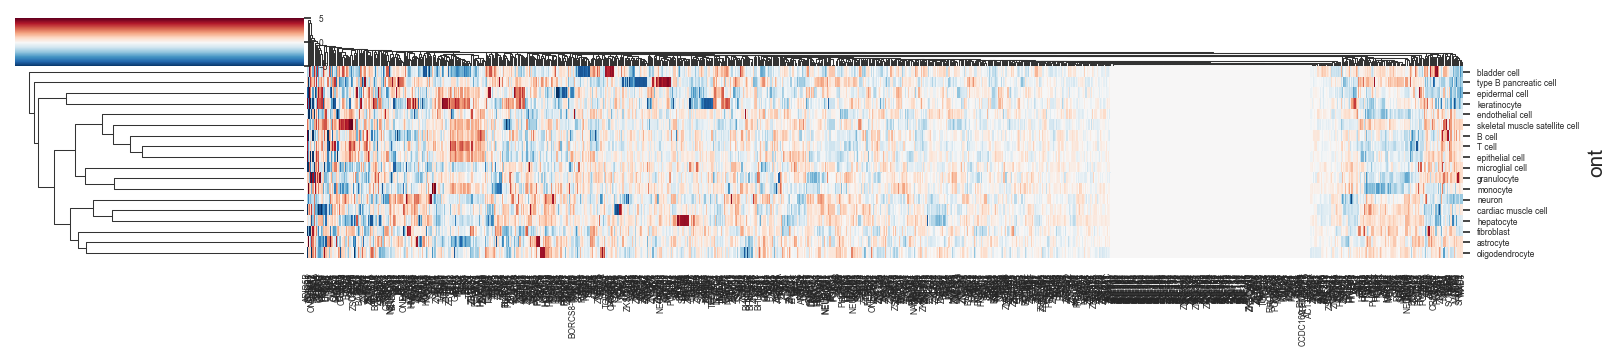

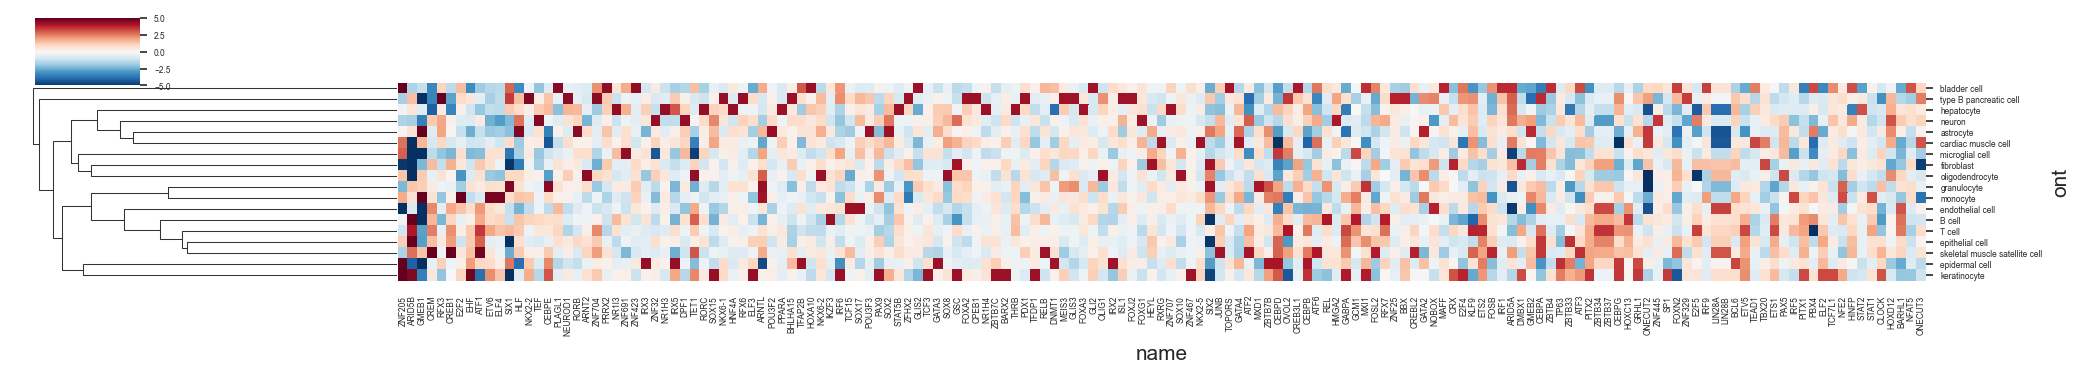

In [113]:

rcParams['figure.dpi'] = 150

n = ni
sns.set({'ytick.labelsize': 4, 'xtick.labelsize': 4})
hm3_show = hm3.reindex(topN).transpose()
hm3_show.columns = [str(c).split("_")[0] for c in hm3_show]

fs = [14,2.5]
sns.clustermap(hm3_show, cmap='RdBu_r', vmax=5, vmin=-5, yticklabels=True, xticklabels=True, figsize=fs)
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
plt.subplots_adjust(right=0.7, bottom=0.3)
# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s_topN_nonsorted" % (by, g))
# plt.close()

hm3_show = hm3.reindex(bottomN).transpose()
hm3_show.columns = [str(c).split("_")[0] for c in hm3_show]
sns.clustermap(hm3_show, cmap='RdBu_r', vmax=5, vmin=-5, yticklabels=True, xticklabels=True, figsize=fs)
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
plt.subplots_adjust(right=0.7, bottom=0.3)


# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s_bottomN_nonsorted" % (by, g))
# plt.close()

bottom = 0.5
N = 12

tophm = hm3.reindex(topN).transpose()
# tophm = tophm.ix[:, tophm.max(axis=1).sort_values(ascending=False).index]
# get the row clustering once
clu_tmp = sns.clustermap(tophm, cmap='RdBu_r', vmax=5, vmin=-5, yticklabels=True, xticklabels=True, col_cluster=False, figsize=fs)
tophm = tophm.reindex([tophm.index[idx] for idx in clu_tmp.dendrogram_row.reordered_ind])
# plt.close()

(18, 157)
0
18
36
54
72
90
108
126
144


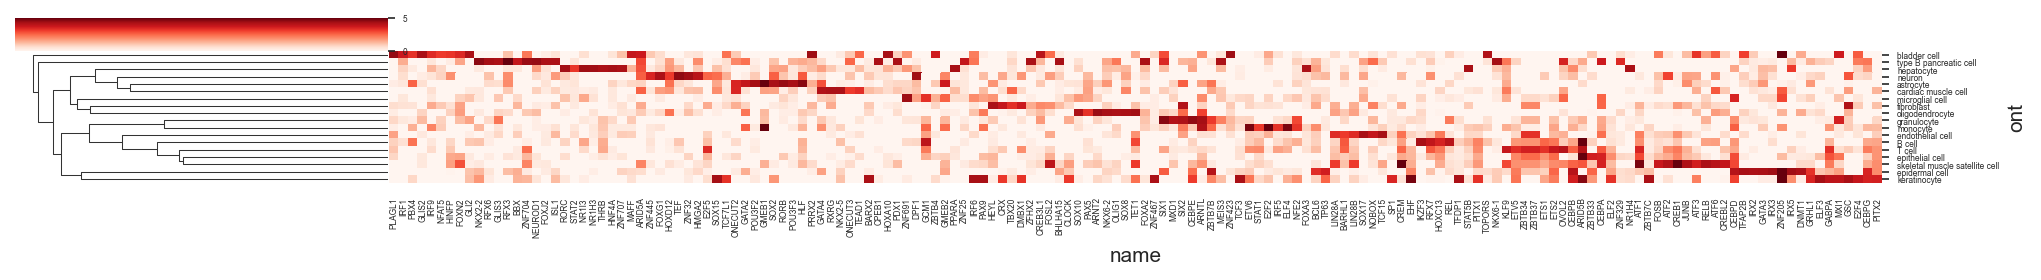

In [115]:


# get top N cases by row and shift them towards the left
order_by_row = {}
added = set()
print(tophm.shape)
while len(added) < tophm.shape[1]:
    print(len(added))
    for ri, r in tophm.iterrows():
        for s in (tophm.loc[ri].sort_values(ascending=False).index if not apply_rank else tophm.rank(ascending=False).loc[ri].sort_values(ascending=True).index) :
            if not ri in order_by_row:
                order_by_row[ri] = []
            if not s in order_by_row[ri] and not s in added:
                order_by_row[ri].append(s)
                added.add(s)
                break
        # print ri, tophm.shape[1] / tophm.shape[0], len(next_added)
    if len(order_by_row[ri]) >= N :
        break

order = [si for ri, r in tophm.iterrows() for si in order_by_row[ri]]
tophm = tophm[order]
clu = sns.clustermap(tophm, cmap='Reds', vmax=5, vmin=0, yticklabels=True, xticklabels=True, col_cluster=False, figsize=fs)
tophm = tophm.reindex([tophm.index[idx] for idx in clu.dendrogram_row.reordered_ind])
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
plt.subplots_adjust(right=0.9, bottom=bottom)

# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s_topN_rank_%s" % (by, g, apply_rank))
# plt.close()



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

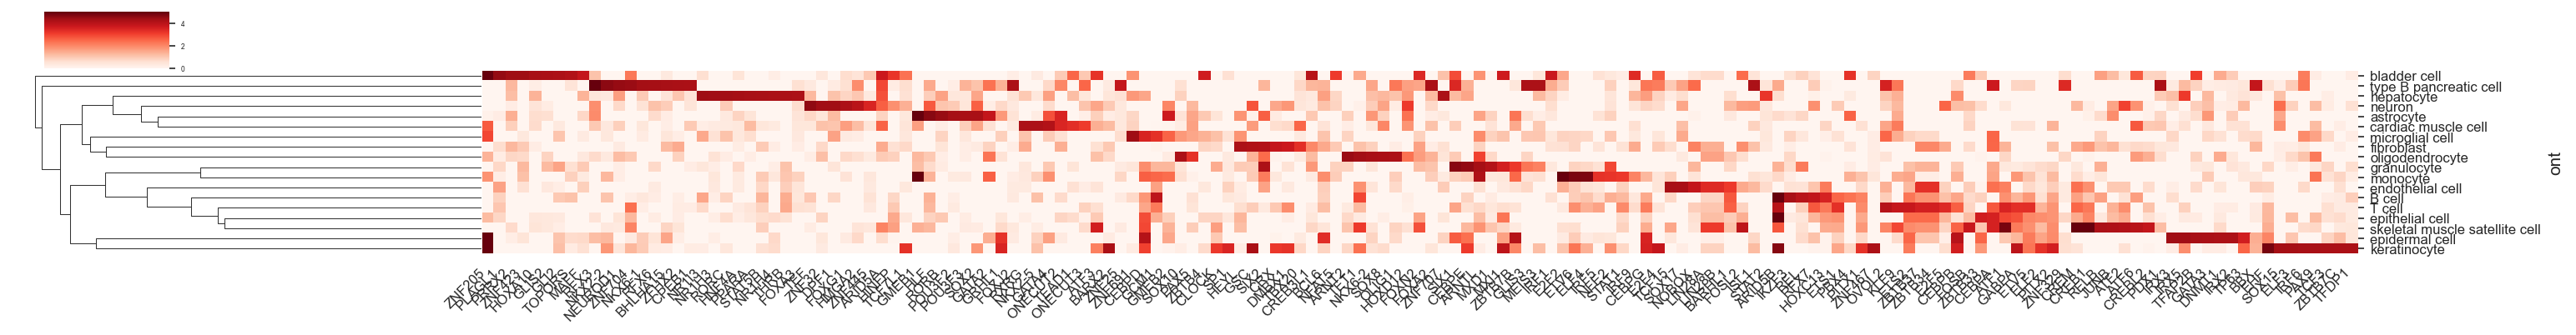

In [122]:

fs = [20,2.5]

# get top N cases by row and shift them towards the left
order_by_row = {}
added = set()

while len(added) < tophm.shape[1]:
    # print(len(added))
    for ri, r in tophm.iterrows():
        for s in tophm.loc[ri].sort_values(ascending=False).index:
            if not ri in order_by_row:
                order_by_row[ri] = []
            if not s in order_by_row[ri] and not s in added:
                order_by_row[ri].append(s)
                added.add(s)
                break
        # print ri, tophm.shape[1] / tophm.shape[0], len(next_added)
    if len(order_by_row[ri]) >= N :
        break

order = [si for ri, r in tophm.iterrows() for si in order_by_row[ri]]
tophm = tophm[order]
tophm.columns = [c.split("_")[0] for c in tophm]
clu = sns.clustermap(tophm, cmap='Reds', vmax=5, vmin=0, yticklabels=True, xticklabels=True, col_cluster=False, figsize=fs)
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
# plt.subplots_adjust(right=0.9, bottom=bottom)
plt.setp(clu.ax_heatmap.get_xticklabels(), rotation=45, fontsize=8, ha='right')
plt.setp(clu.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8)

# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s_topN" % (by, g), log=True)
# plt.close()




12

(18, 999)
0
18
36
54
72


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

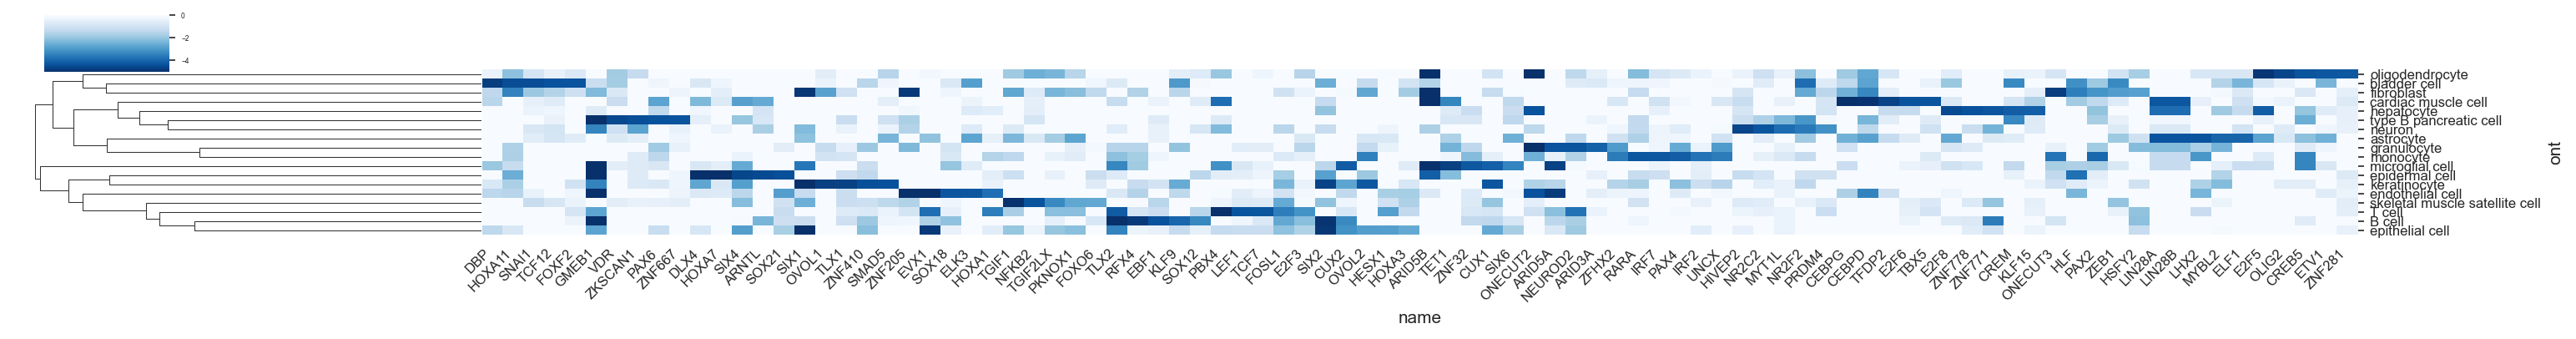

In [127]:
N = 5

bottomhm = hm3.reindex(bottomN).transpose()
# tophm = tophm.ix[:, tophm.max(axis=1).sort_values(ascending=False).index]
# get the row clustering once
clu_tmp = sns.clustermap(bottomhm, cmap='RdBu_r', vmax=5, vmin=-5, yticklabels=True, xticklabels=True, col_cluster=False)
tmp_idx = [bottomhm.index[idx] for idx in clu_tmp.dendrogram_row.reordered_ind]
bottomhm = bottomhm.reindex([bottomhm.index[idx] for idx in clu_tmp.dendrogram_row.reordered_ind])
plt.close()

# get top N cases by row and shift them towards the left
order_by_row = {}
added = set()
print(bottomhm.shape)


while len(added) < bottomhm.shape[1]:
    print(len(added))
    for ri, r in bottomhm.iterrows():
        for s in (bottomhm.loc[ri].sort_values(ascending=False).index if not apply_rank else
                  bottomhm.rank(ascending=True, axis=1).loc[ri].sort_values(ascending=True).index) :
            if not ri in order_by_row:
                order_by_row[ri] = []
            tf_name = s.split("_")[0]
            if not s in order_by_row[ri] and not tf_name in added:
                order_by_row[ri].append(s)
                added.add(tf_name)
                break
        # print ri, tophm.shape[1] / tophm.shape[0], len(next_added)
    if len(order_by_row[ri]) >= N or len(added) >= bottomhm.shape[1]:
        break

order = [si for ri, r in bottomhm.iterrows() for si in order_by_row[ri]]
# assert len(set(order)) == bottomhm.shape[1]
bottomhm = bottomhm[order]
clu = sns.clustermap(bottomhm, cmap='Blues_r', vmax=0, vmin=-5, yticklabels=True, xticklabels=True, col_cluster=False,
                     figsize=fs)
final_idx = [bottomhm.index[idx] for idx in clu.dendrogram_row.reordered_ind]
plt.setp(clu.ax_heatmap.get_xticklabels(), rotation=45, fontsize=8, ha='right')
plt.setp(clu.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8)
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
# plt.subplots_adjust(right=0.9, bottom=bottom)

# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s_bottomN_rank_%s" % (by, g, apply_rank), log=True)
# plt.close()


In [128]:




bottomhm = bottomhm.reindex([bottomhm.index[idx] for idx in clu.dendrogram_row.reordered_ind])

# get top N cases by row and shift them towards the left
order_by_row = {}
added = set()
print(bottomhm.shape)
while len(added) < bottomhm.shape[1]:

    print(len(added))
    for ri, r in bottomhm.iterrows():
        for s in bottomhm.loc[ri].sort_values(ascending=True).index:
            if not ri in order_by_row:
                order_by_row[ri] = []
            tf_name = s.split("_")[0]
            if not s in order_by_row[ri] and not tf_name in added:
                order_by_row[ri].append(s)
                added.add(tf_name)
                break
        # print ri, tophm.shape[1] / tophm.shape[0], len(next_added)
    if len(order_by_row[ri]) >= N :
        break

order = [si for ri, r in bottomhm.iterrows() for si in order_by_row[ri]]
# assert len(set(order)) == bottomhm.shape[1]
bottomhm = bottomhm[order]



(18, 90)
0
18
36
54
72


['ARID5B\nE2F5\nOLIG2\nCREB5\nETV1', 'DBP\nHOXA11\nSNAI1\nTCF12\nFOXF2', 'SIX1\nONECUT3\nHLF\nPAX2\nZEB1', 'CEBPG\nCEBPD\nTFDP2\nE2F6\nTBX5', 'E2F8\nZNF778\nZNF771\nCREM\nKLF15', 'GMEB1\nVDR\nZKSCAN1\nPAX6\nZNF667', 'HIVEP2\nNR2C2\nMYT1L\nNR2F2\nPRDM4', 'LIN28A\nLIN28B\nLHX2\nMYBL2\nELF1', 'ONECUT2\nARID5A\nNEUROD2\nARID3A\nZFHX2', 'RARA\nIRF7\nPAX4\nIRF2\nUNCX', 'TET1\nZNF32\nCUX1\nSIX6\nHOXA3', 'DLX4\nHOXA7\nSIX4\nARNTL\nSOX21', 'OVOL1\nTLX1\nZNF410\nSMAD5\nHSFY2', 'ZNF205\nEVX1\nSOX18\nELK3\nHOXA1', 'TGIF1\nNFKB2\nTGIF2LX\nPKNOX1\nFOXO6', 'PBX4\nLEF1\nTCF7\nFOSL1\nE2F3', 'TLX2\nRFX4\nEBF1\nKLF9\nSOX12', 'SIX2\nCUX2\nOVOL2\nHESX1\nZNF281']
2
7
12
17
22
27
32
37
42
47
52
57
62
67
72
77
82
87


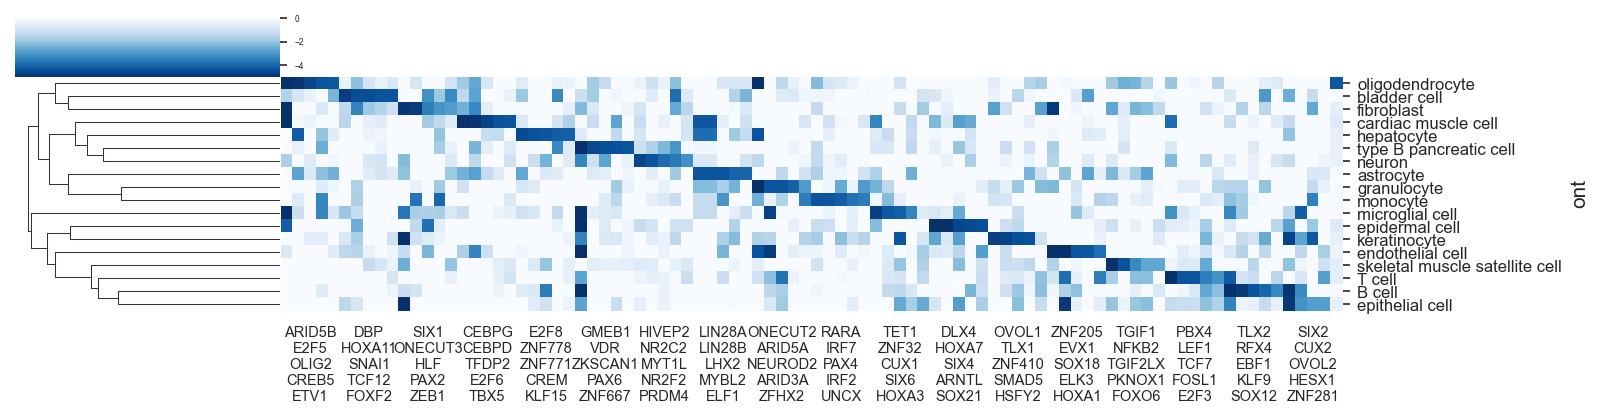

In [137]:
fs = [10, 7]
# only show specific tissue (shortlist 1 and 2)
bottomhm.columns = [c.split("_")[0] for c in bottomhm]

# bottomhm = bottomN[bottomhm]
bottomhm = bottomhm[bottomhm.index.to_series().isin(selected)]

clu = sns.clustermap(bottomhm, cmap='Blues_r', vmax=0, vmin=-5, yticklabels=True, xticklabels=True, col_cluster=False, figsize=fs)
final_idx = [bottomhm.index[idx] for idx in clu.dendrogram_row.reordered_ind]
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
plt.setp(clu.ax_heatmap.get_xticklabels(), rotation=45, fontsize=8, ha='right')
plt.setp(clu.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8)


custom_xlabels = True
if custom_xlabels:
    # show labels as text
    n_by_row = [len(order_by_row[ri]) for ri in bottomhm.index]
    xlabs = ["\n".join([s.split("_")[0] for s in order_by_row[ri]]) for ri in bottomhm.index]
    pos = [int(sum(n_by_row[:i]) + int(n_by_row[i] / 2))  for i in range(len(n_by_row))]
    final_xlabs = ['' for i in range(bottomhm.shape[1])]
    print(xlabs)
    for xi, lab in zip(pos, xlabs):
        print(xi)
        final_xlabs[xi] = lab
    clu.ax_heatmap.set_xticklabels(final_xlabs,
                                   rotation=0, fontsize=7, ha='center')
bottom = 0.7
plt.subplots_adjust(right=0.9, bottom=bottom)

# savepdf("../../../data/figures/heatmap_tabula_muris_%s_%s_bottomN" % (by, g), log=True)
# plt.close()


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

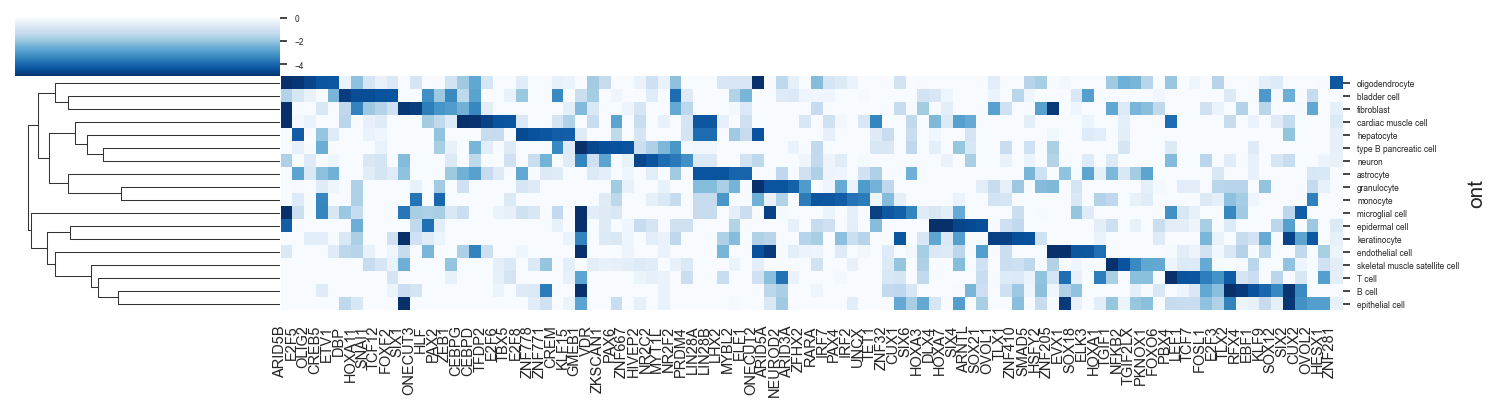

In [143]:
order = [si for ri, r in bottomhm.iterrows() for si in order_by_row[ri]]
# assert len(set(order)) == bottomhm.shape[1]
bottomhm = bottomhm[order]
clu = sns.clustermap(bottomhm, cmap='Blues_r', vmax=0, vmin=-5, yticklabels=True, xticklabels=True, col_cluster=False,
                     figsize=fs)
final_idx = [bottomhm.index[idx] for idx in clu.dendrogram_row.reordered_ind]
# sns.clustermap(hm3[hm3.index.str.contains('My')], cmap='RdBu_r', vmax=5, vmin=-5)
plt.subplots_adjust(right=0.9, bottom=bottom)
plt.setp(clu.ax_heatmap.get_xticklabels(), rotation=90, fontsize=7, ha='right')
